In [13]:
import sklearn.datasets as sk
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# from random import shuffle
from sklearn.utils import shuffle

dataset = sk.load_iris()

In [14]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
dataset.data, dataset.target = shuffle(dataset.data, dataset.target)

In [16]:
index = 0
new_dataset = []
new_target = []

for data in dataset.data:
    
    if dataset.target[index] == 0 or dataset.target[index] == 1:
        new_dataset.append(data)
        new_target.append(dataset.target[index])
        # print(data)
    index += 1

new_dataset = np.array(new_dataset)
new_target = np.array(new_target)
new_target_names = ['setosa', 'versicolor']

new_dataset.shape

(100, 4)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, new_target, random_state=0, train_size = .6)
X_train.shape

(60, 4)

In [18]:
def sigmoid(z):
    # sigmoid activation
    return 1/(1 + np.exp(-z))

In [19]:
rand = np.random.RandomState(0)
theta = rand.uniform(size=(5, 1))*0.5

alpha = 0.1


In [20]:
theta0 = []
theta1 = []
theta2 = []
theta3 = []

for i in range(20):
    # print("Number of Iterations:", i)
    for j in range(X_train.shape[0]):
        
        val = 0

        length = theta.shape[0]-1
        for k in range(length):
            val = val + X_train[j][k]*theta[k+1]
        
        y_hat = sigmoid(val + theta[0])
        error = y_train[j] - y_hat

        for k in range(length):
            theta[k+1] = theta[k+1] + alpha*X_train[j][k]*error
        
        theta[0] = theta[0] + alpha*error

        theta0.append(theta[0])
        theta1.append(theta[1])
        theta2.append(theta[2])
        theta3.append(theta[3])

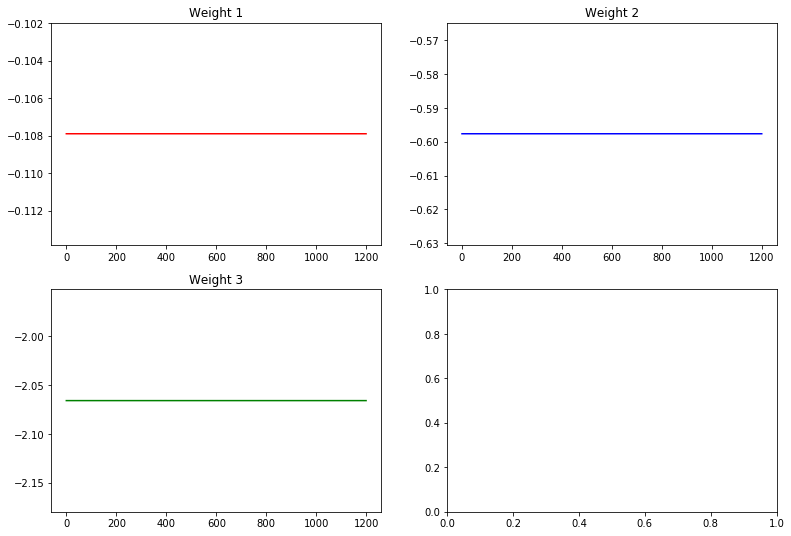

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(13, 9))
ax[0,0].title.set_text("Weight 1")
ax[0,1].title.set_text("Weight 2")
ax[1,0].title.set_text("Weight 3")
ax[0,0].plot(theta0, "r-")
ax[0,1].plot(theta1, "b-")
ax[1,0].plot(theta2, "g-")
plt.show()

In [10]:
def predict(X, theta):
    val = theta[0]
    for i in range(len(theta)-1):
        val = val + X[i]*theta[i+1]
    
    return sigmoid(val)

In [11]:
index = 0
print(y_test[index])
predict(X_test[index],theta)

1


array([0.99915095])